In [ ]:
# Gerekli kütüphaneler
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0 # EfficientNetB0 import edildi
from tensorflow.keras.applications.efficientnet import preprocess_input # EfficientNet için preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [ ]:

# Google Drive'ı bağlama
from google.colab import drive
drive.mount('/content/drive')

# Veri seti yolunu tanımla
base_dir = '/content/drive/MyDrive/Proje17/chest_xray'
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

print("Veri seti yolları başarıyla tanımlandı!")

# Resim boyutu ve hiperparametreler
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 50


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Veri seti yolları başarıyla tanımlandı!


In [ ]:
# Veri artırma ve normalizasyon
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

print("Veri artırma ve veri yükleyici başarıyla ayarlandı!")


Found 2415 images belonging to 2 classes.
Found 268 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Veri artırma ve veri yükleyici başarıyla ayarlandı!


In [ ]:
# EfficientNetB0 modeli oluşturma
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)  # Binary Classification

model = Model(inputs=base_model.input, outputs=predictions)

# Transfer Learning: EfficientNet katmanlarını dondur
for layer in base_model.layers:
    layer.trainable = False

# Model derleme
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("EfficientNetB0 modeli başarıyla oluşturuldu ve derlendi!")

EfficientNetB0 modeli başarıyla oluşturuldu ve derlendi!


In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Proje17/best_model.keras', monitor='val_accuracy', save_best_only=True)

print("Callback'ler başarıyla tanımlandı!")

Callback'ler başarıyla tanımlandı!


In [ ]:
# Model eğitimi
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=32,  # Epoch sayısını 10 olarak ayarladık
    callbacks=[early_stopping, checkpoint],
    verbose=1
)
model.save('model2_name.keras')  # Keras formatında kaydetmek için

print("Model başarıyla eğitildi!")


Epoch 1/32
76/76 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.8594 - loss: 0.3497 - val_accuracy: 0.8731 - val_loss: 0.2324
Epoch 2/32
76/76 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.8940 - loss: 0.2650 - val_accuracy: 0.8769 - val_loss: 0.2370
Epoch 3/32
76/76 ━━━━━━━━━━━━━━━━━━━━ 133s 921ms/step - accuracy: 0.9054 - loss: 0.2521 - val_accuracy: 0.8881 - val_loss: 0.2316
Epoch 4/32
76/76 ━━━━━━━━━━━━━━━━━━━━ 83s 896ms/step - accuracy: 0.9167 - loss: 0.2381 - val_accuracy: 0.9216 - val_loss: 0.1774
Epoch 5/32
76/76 ━━━━━━━━━━━━━━━━━━━━ 81s 914ms/step - accuracy: 0.9224 - loss: 0.2166 - val_accuracy: 0.9328 - val_loss: 0.1537
Epoch 6/32
76/76 ━━━━━━━━━━━━━━━━━━━━ 82s 906ms/step - accuracy: 0.9092 - loss: 0.2181 - val_accuracy: 0.8955 - val_loss: 0.2196
Epoch 7/32
76/76 ━━━━━━━━━━━━━━━━━━━━ 78s 965ms/step - accuracy: 0.9333 - loss: 0.1677 - val_accuracy: 0.8918 - val_loss: 0.2114
Epoch 8/32
76/76 ━━━━━━━━━━━━━━━━━━━━ 79s 888ms/step - accuracy: 0.9178 - loss: 0.2075 - val_accuracy:

In [ ]:
from google.colab import files
files.download('model_name.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NameError: name 'history' is not defined

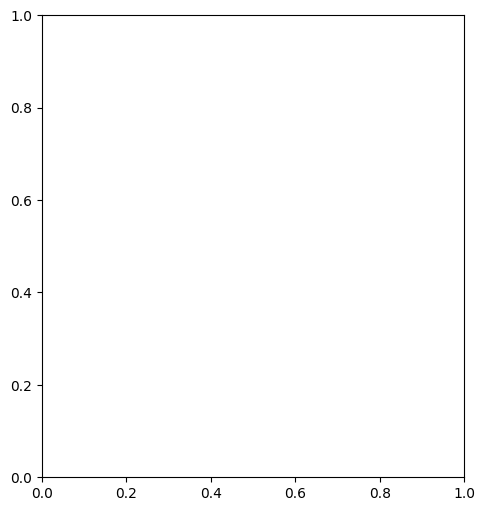

In [3]:
import matplotlib.pyplot as plt
# Eğitim/Doğrulama eğrilerini çizme
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

print("Eğitim ve doğrulama eğrileri başarıyla çizildi!")

20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 929ms/step - accuracy: 0.8858 - loss: 0.2628
Test Accuracy: 90.87%
Test seti değerlendirilmesi tamamlandı!
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 647ms/step


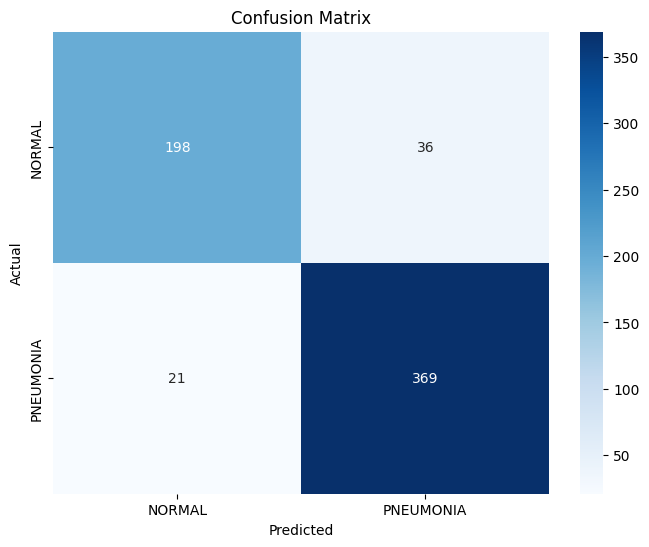

In [ ]:
# Test seti değerlendirme
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

print("Test seti değerlendirilmesi tamamlandı!")

# Confusion Matrix
Y_pred = model.predict(test_generator)
y_pred = np.round(Y_pred).astype(int).flatten()
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)
class_names = list(test_generator.class_indices.keys())

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [ ]:
# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

print("Confusion Matrix ve Classification Report başarıyla görüntülendi!")

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.91      0.88      0.89       234
   PNEUMONIA       0.93      0.95      0.94       390

    accuracy                           0.92       624
   macro avg       0.92      0.91      0.91       624
weighted avg       0.92      0.92      0.92       624

Confusion Matrix ve Classification Report başarıyla görüntülendi!
